#### 数据分析基础项目

## 分析数据集

泰坦尼克号数据：包括泰坦尼克号上 2224 名乘客和船员中 891 名的人口学数据和乘客基本信息。

## 分析的问题

在泰坦尼克号里，是哪些因素影响着幸存率？
可能影响的因素：
1. 性别
2. 年龄
3. 船票种类

## 预览数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('titanic-data.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


## 分析幸存率是否和性别有关
分别求出男性和女性的生还率，然后生成直方图

In [2]:
has_sex_df = df[~df['Sex'].isnull()]

891

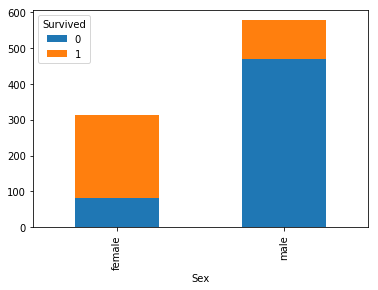

In [3]:
%matplotlib inline
has_sex_df.groupby(['Sex','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked='True')

### 分析幸存率和性别的结果

从上图中我们可以看出，在泰坦尼克号上女性的幸存率要比男性高出很多，所以极有可能跟性别有关，但是我们还需要再分析一下其它一些因素。

## 分析幸存率是否与年龄有关

我们可以猜测，年轻人要比老年人或者儿童在遇到危险时，有更强的求生能力，能更快速躲避危险，所以我们需要依据年龄进行分析，看看是否与年龄有关。

    设计分析过程：
1. 检查数据完整性（年龄），过滤掉缺少信息的记录
2. 将年龄进行分段，以10岁为一个阶段进行划分
   划分后，0-9岁一组，10-19岁一组，以此类推
3. 分析各年龄段的幸存率

In [4]:
# 去除没有年龄的记录
age_not_null_df = df[~df['Age'].isnull()]
age_not_null_df['Age'].count()

714

C:\Users\niushuai\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


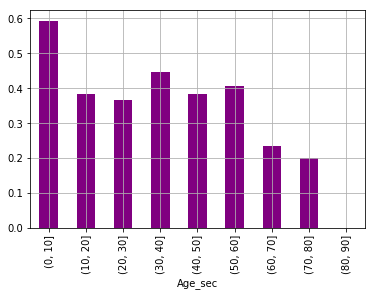

In [5]:
# 展示各年龄段的幸存比例
age_not_null_df['Age_sec'] = pd.cut(age_not_null_df['Age'], bins=range(0,91,10), precision=0)
age_not_null_df.groupby('Age_sec')['Survived'].mean().plot(kind='bar', grid=True, color='purple')

Text(0.5,1,'Count of passengers across Age and Survival')

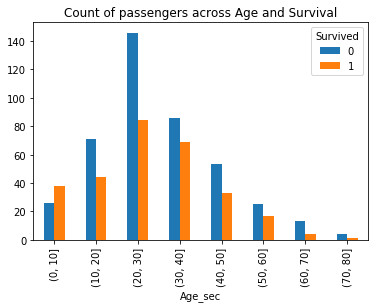

In [8]:
# 展示和年龄段的幸存人数
age_not_null_df.groupby(['Age_sec', 'Survived']).size().unstack().plot(kind='bar', stacked=False)
plt.title("Count of passengers across Age and Survival")

通过对比幸存率和人数，应该说幸存率和年龄关系不是太大，除了儿童，基本上所有的年龄段的人的幸存率都有点偏低。

## 分析幸存率和船舱级别是否有关

我在网上搜索了一些相关资料，[其中一篇文章](https://baike.baidu.com/tashuo/browse/content?id=db3f0c11498764d5057ca726)里这样写道：
事后证明，零点27分，也就是沉船当地时间（和纽约的时差）凌晨1点20分，在最早下水的几艘救生船中，获救的不只是妇女儿童，男性获救者几乎占了一半左右，而且几乎都是头等舱男乘客。  
为了验证这种说法是否正确，我们需要分析各种船票是否会影响幸存率。

In [9]:
# 过滤船票类型缺失的数据
pclass_not_null_df = df[~df['Pclass'].isnull()]

In [ ]:
# 查看各种票与对应的幸存率的关系
pclass_not_null_df.groupby(['Pclass'])['Survived'].mean().plot(kind='bar', grid=True)

In [ ]:
df.groupby(['Pclass', 'Survived']).size().unstack().plot(kind='bar', stacked=False)
plt.title("Count of passengers across Pclass and Survival")

从图可以可以看出，船舱级别越高的票种，对应的幸存率越高。一级票比三级票幸存率高出一倍多。

# 最终结论
通过以上的数据分析结果，我得出的结论是：影响幸存率最大的因素是性别和船舱级别。越高的船舱级别意味着社会级别越高的人士，他们可能具有优先转移到救援船的资格。但是为什么女性在这次灾难中幸存率为什么这么高？具体原因未知。

# 存在的限制因素

以上的分析过程和结果都是基于已提供的数据集，而数据集里的信息只能片面地反响一部分当时的情况，像“乘客是否会游泳”这种可能会影响幸存率的信息并没有存在于数据集中，所以分析结果可能会受到数据集的影响。  

另外，我选择的性别、年龄、票种这三个可能会影响幸存率的因素完全是基于我的经验和感觉，所以实际情况可能是其它没有分析到的因素更会影响到幸存率，只是我没考虑到。


## 参考资料
[Pandas简易入门（二） - kylinlin - 博客园](http://www.cnblogs.com/kylinlin/p/5226860.html)  
[python 报ValueError: Bin labels must be one fewer than the number of bin edges](https://blog.csdn.net/Norsaa/article/details/77774634)  
[用Pandas作图 - CSDN博客](https://blog.csdn.net/fennvde007/article/details/37693523)